# **For creating RAG application**

1. DATA- Youtube Video
2. llamaindex framework
3. Embedding Model
4. DATA BASE (Mlulti modal vector DB - Lance DB)
5. PROMPT
6. LLM -  Multimodal LLM model(GPT-4V or GEMINI-PRO-VISION or Grok 1.5 Vision(Elonmusk))

Connect all the things


#### **This script executed in Colab notebook**

- Here we used **Llamaindex Framework**
- Here in **Llamaindex used Multi modal Lance db** and saved **in-memory**. We can try cloud db also, here we didnt try
- Here **Multimodel data supporting LanceDB** Helps to do **similarity search on text and images** and provides related **o/p(Text+Images) for User Q**
- Here **Multimodal LLM** Helps to do **Summarized results based on prompt provided with LanceDB O/P Text and images** and provides the structured O/P. Here this multi model LLM **Reads images and provides O/P As text or image based on mentioned in prompt body**

# **Steps:**
- **Data ingestion from Youtube**
  - Download video from YouTube, process and store it.
  - Extract image, extract audio, then from audio extract text
	- Apply above all Preprocessing steps and save Image and text in output folder
- **VectorStore Index** creation in LlamaIndex - and sava in **LanceDB Inmemory**
  - Build **Multi-Modal index and vector store** for both **texts and images**.
	- Initialize LanceDB **Textstore and ImageStore**
	- Set **Llama idex Storage context with lancedb detail**
	- **Load Embedding model** in LlamaIndex
	- Create **multi modal LLlama index**(Does embedding to vector and adds indexing) and **stores in Lance db in memory**
- Create **Prompt template** using llama_index.core
	- **Retrieve relevant both images and context/text from Lancedb**, use both to augment the Prompt template
- Using **GPT4V/Gemini pro** for reasoning the correlations between the **input query and augmented data** and **generating final response**.
	- Get **Final RAG response** using LlamaIndex- Multimodel supporting LLM - **GPT 4 Vision**
		- This we could nt do, beacuse its paid model, so no APIKey available
	- Get **Final RAG response** using LlamaIndex- Multimodel supporting LLM - **Gemini Pro Vision**
		- Initialize **GeminiMultiModal**
		- **RAG O/P: Complete a prompt with a bunch of images**
		- **RAG O/P: Steam Complete a prompt with a bunch of images**


## **Local Folder - Lancedb(In Memory**
  ![plot](03a_Multimodel_Lancedb_inmemory.png)

## **RAG Architecture**
  ![plot](03b_Multimodel_rag_architecture.png)

In [ ]:
%pip install llama-index-vector-stores-lancedb -q
%pip install llama-index-multi-modal-llms-openai q
%pip install llama-index-embeddings-clip -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip install llama_index ftfy regex tqdm  -q
%pip install -U openai-whisper -q #convert audio to text
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision -q
%pip install matplotlib scikit-image -q
%pip install lancedb -q #Multi modal vectordb
%pip install moviepy -q #library for video editing
%pip install pytube -q #to download youtube video
%pip install pydub  -q #Manipulate audio with an simple and easy high level interface.
%pip install SpeechRecognition -q
%pip install ffmpeg-python -q
%pip install soundfile -q

!pip install llama-index-readers-file -q

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-qgej2_3y
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-qgej2_3y
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


# **Import all libraries**

In [ ]:
from moviepy.editor import VideoFileClip #this funct to retrive image and audio from video
from pathlib import Path #It converts path specific to linux/window(backward/forward slash)
import speech_recognition as sr # It required to download text from audio
from pytube import YouTube #to download youtube vide
from pprint import pprint #print by removing unnecessary things

import os
from PIL import Image
import matplotlib.pyplot as plt

# **Data ingestion from Youtube**

In [ ]:
#To know current folder
os.getcwd()

'/content'

## **Create data folders in local**

In [ ]:
video_url="https://youtu.be/3dhcmeOTZ_Q" #Used just 3min linear regression video
input_video_folder= "/content/video_data/"
input_video_path  =input_video_folder + "input_vid.mp4"  #downloaded video saved as input_vid.mp4
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [ ]:
!mkdir mixed_data

In [ ]:
input_video_path

'/content/video_data/input_vid.mp4'

In [ ]:
#filepath = output_video_path + "input_vid.mp4"
#Path(output_folder).mkdir(parents=True, exist_ok=True)

In [ ]:
#Path(filepath).mkdir(parents=True,exist_ok=True)

## **Data Preprocessing fuctions**

In [ ]:
import matplotlib.pyplot as plt

### Function to display image from its path

In [ ]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break


### Function to download video from youtube and save metadata
- This function saves video in **/content/video_data/input_vid.mp4** and returns metadata of video(Author, video name etc)

In [ ]:
from pytube import YouTube #download youtube video

def download_video(url,download_folder):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  #download video to local path
  yt.streams.get_highest_resolution().download(
        output_path=download_folder, filename="input_vid.mp4"  #Downloaded as input_vid.mp4
    )
  return metadata

### Function to Extract Image from video based on fps(Frame per second)

In [ ]:
from moviepy.editor import VideoFileClip #this funct to retrive image and audio from video

def video_to_images(video_path,output_flder):
  clip=VideoFileClip(video_path)

  #Write images to output folder
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

### Function to download audio from video
- which req to get text in next step

In [ ]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)

  #download audio
  audio=clip.audio
  audio.write_audiofile(output_audio_path)


### Function to extract Text from Audio

In [ ]:
import speech_recognition as sr # It required to download text from audio

def audio_to_text(audio_path, output_folder):

  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

      # Save text as output_text.txt
      with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
        print("Text data saved to file")
        file.close()

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text



## **Apply Preprocessing fuctions**

In [ ]:
video_url, input_video_folder

('https://youtu.be/3dhcmeOTZ_Q', '/content/video_data/')

In [ ]:
# Download video from youtube and get metadata
metadata_vid = download_video(video_url, input_video_folder)

In [ ]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7215}

In [ ]:
input_video_path, output_folder

('/content/video_data/input_vid.mp4', '/content/mixed_data/')

In [ ]:
# Download images from video
video_to_images(input_video_path,output_folder)

t:   2%|▏         | 1/47 [00:34<26:37, 34.73s/it, now=None]

Moviepy - Writing frames /content/mixed_data/frame%04d.png.



t:   2%|▏         | 1/47 [00:47<36:41, 47.87s/it, now=None]

Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [ ]:
input_video_path, output_audio_path

('/content/video_data/input_vid.mp4', '/content/mixed_data/output_audio.wav')

In [ ]:
# Download audio from video
video_to_audio(input_video_path,output_audio_path)

t:   2%|▏         | 1/47 [05:09<3:56:57, 309.09s/it, now=None]

MoviePy - Writing audio in /content/mixed_data/output_audio.wav



t:   2%|▏         | 1/47 [05:10<3:58:25, 310.99s/it, now=None]

MoviePy - Done.


In [ ]:
output_audio_path,output_folder

('/content/mixed_data/output_audio.wav', '/content/mixed_data/')

In [ ]:
# Download text from audio
text_data=audio_to_text(output_audio_path,output_folder)

Text data saved to file


In [ ]:
text_data[:100]

' Lanyard regression is a statistical technique for modeling the relationship between an output varia'

In [ ]:
#Remove audio file from folder, which not required(We have all infi in text now)
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


# **VectorStore Index creation in LlamaIndex - and sava in LanceDB Inmemory**


In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex #It is same lik VectorStoreIndex, but supports multi modal
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

from llama_index.vector_stores.lancedb import LanceDBVectorStore #Lancedb

## **Initialize LanceDB Textstore and ImageStore**

In [ ]:
# Here uri is unmemory local folder name
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

## **Set Llama idex Storage context with lancedb detail**

In [ ]:
storage_context=StorageContext.from_defaults(vector_store=text_store,
                                             image_store=image_store)

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
# Read the corpus (Text+images) from output_folder
documents=SimpleDirectoryReader(output_folder).load_data()

In [ ]:
documents[:2]

[ImageDocument(id_='5a84a171-624c-43ad-b215-e9fed1e0182d', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 2759, 'creation_date': '2024-04-19', 'last_modified_date': '2024-04-19'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='a43f679d-854b-4602-9561-d1dccd94ef25', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 'frame0001.png', 'file

## **Load Embedding model in LlamaIndex**

In [ ]:
%pip install llama-index-embeddings-huggingface -q
%pip install llama-index-embeddings-instructor -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Import embedding model from hugging face
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
embed_model=HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Create multi modal LLlama index(Does embedding to vector and adds indexing) and stores in Lance db in memory**

- In **MultiModalVectorStoreIndex**  we specified **hugging face embedding** below, else it uses **dafault OPENAI Embedding** We need to connect to openai by **APIKEY** for executing this step

In [ ]:
#from google.colab import userdata
#OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
#os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [ ]:
# Create multi modal LLlama index(Does embedding to vector and adds indexing) and stores in Lance db in memory
index = MultiModalVectorStoreIndex.from_documents(documents,
                                                  storage_context=storage_context,
                                                  embed_model =embed_model)
                                    #Here we specified hugging face embedding, else it uses dafault OPENAI Embedding

In [ ]:
#Here retriever_engine, Retrive from index/vectorsearch/Lancedb inmemory
# It provides top 5 text tretrival (similarity_top_k=5) and top 5 image retrival (image_similarity_top_k=5)

retriever_engine=index.as_retriever(similarity_top_k=5, image_similarity_top_k=5)

# **Create Prompt template using  llama_index.core**

In [ ]:
#Convert video medatato json format, which will be passed to prompt template
import json
metadata_str=json.dumps(metadata_vid)

### Template 1 with Context/context_str

In [ ]:
#Context/context_str: Lancedb text and image similarity search result
#metadata_str: Video metadata
#Query/query_str : Usery Q
#Answer: LLM response

qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

### Template 2 without Context/context_str

In [ ]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

### Test Lancedb Similarity search O/P based on user Q

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [ ]:
#User Q
query_str="what is a O'Reilly platform.?"

In [ ]:
# Lancedb vector O/P
retrieval_results=retriever_engine.retrieve(query_str)

In [ ]:
retrieval_results[:3]

[NodeWithScore(node=TextNode(id_='99e5983f-8470-4170-9d06-781ee829a902', embedding=[-0.015682177618145943, -0.07914964109659195, -0.010749608278274536, 0.02710413560271263, -0.03099946118891239, 0.0397418774664402, 0.053023990243673325, 0.04583492875099182, 0.06178952381014824, 0.00035314366687089205, 0.0075400578789412975, 0.06548462063074112, 0.05496939271688461, 0.03670687600970268, 0.03825219348073006, -0.024223225191235542, -0.030482623726129532, -0.046181220561265945, -0.012822394259274006, 0.005671801045536995, 0.004938998259603977, 0.009248821064829826, 0.0037843685131520033, 0.020751288160681725, -0.09064102917909622, -0.017611157149076462, 0.01604476571083069, 0.060141392052173615, -0.03392505273222923, -0.02245030552148819, 0.004842063877731562, 0.03990785777568817, 0.03285275027155876, -0.011799401603639126, 2.05823175747355e-06, -0.04474148899316788, -0.006508227903395891, 0.00926046073436737, 0.021554069593548775, 0.03707384318113327, 0.059282172471284866, 0.0365778878331

### Retrives both text image results

In [ ]:
retrieved_image=[]
retrieved_text=[]

#Separate text image result under 2 list - retrieved_image and retrieved_text
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)


**Node ID:** 99e5983f-8470-4170-9d06-781ee829a902<br>**Similarity:** 0.18062520027160645<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [ ]:
retrieved_image

['/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0041.png']

In [ ]:
retrieved_text[:1]

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

### Function to separate retrived image and text to separate list
- Separate text image result under 2 list - retrieved_image and retrieved_text
- Above steps only put inside function below

In [ ]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [ ]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 99e5983f-8470-4170-9d06-781ee829a902<br>**Similarity:** 0.18062520027160645<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [ ]:
img

['/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0041.png']

### Read retrived images from o/p corpus folder

In [ ]:
image_documents = SimpleDirectoryReader(input_dir=output_folder,  input_files=img).load_data()
#image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

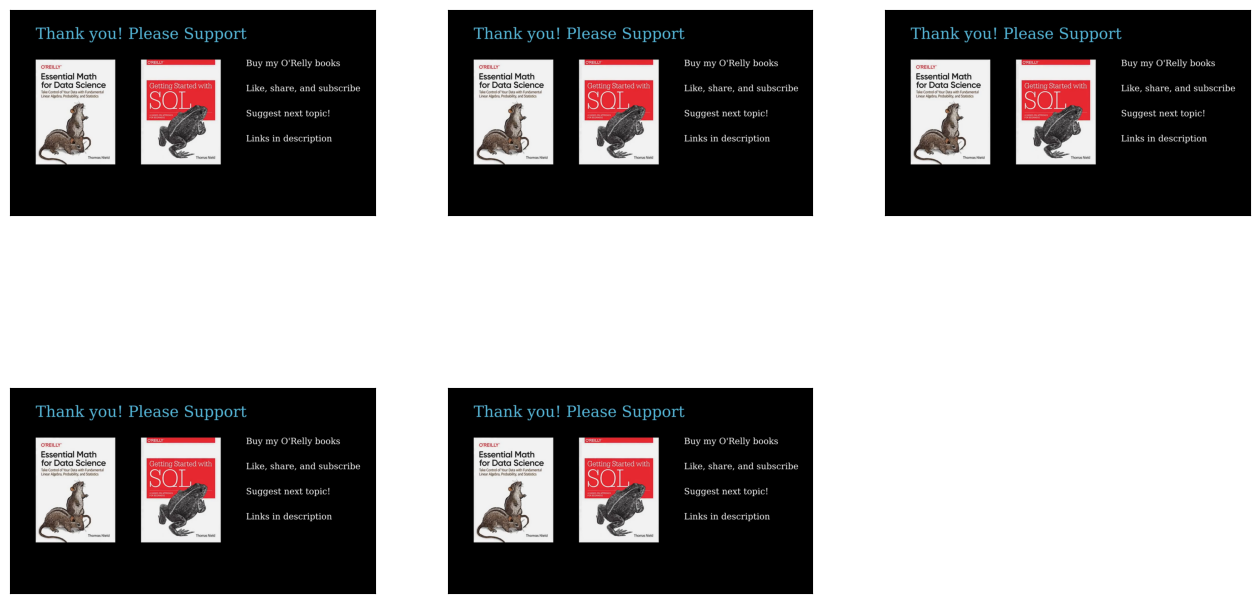

In [ ]:
plot_images(img)

### Put retrived text to context_str

In [ ]:
context_str = "".join(txt)
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

In [ ]:
qa_tmpl_str2

'Given the provided information, including relevant images and retrieved context from the video,     accurately and precisely answer the query without any additional prior knowledge.\n---------------------\nMetadata for video: {metadata_str} \n---------------------\nQuery: {query_str}\nAnswer: '

# **1. Get final RAG response using LlamaIndex- Multimodel supporting LLM - GPT 4 Vision**
- EX: GPT-4V or GEMINI-PRO-VISION or Grok 1.5 Vision(Elonmusk)

In [ ]:
#Access OPENAI Key
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

#Iinitialize gpt4 vision Multi modal
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview",
                                 api_key=OPENAI_API_TOKEN,
                                 max_new_tokens=1500)

### Get Final RAG O/P
- Now its commented we dont have gpt 4 access, which is paid

In [ ]:
"""
### Template 1 with Context/context_str
result=openai_mm_llm.complete(
    #Pass the retrived text here in prompt template
    prompt=qa_tmpl_str.format(context_str=context_str,query_str=query_str, metadata_str=metadata_str),
    image_documents=image_documents,  #Pass the retrived images here
)

### Template 2 without Context/context_str
result2=openai_mm_llm.complete(
    #Pass the retrived text here in prompt template
    prompt=qa_tmpl_str2.format(query_str=query_str, metadata_str=metadata_str),
    image_documents=image_documents2,  #Pass the retrived images here
)
#or
result2=openai_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)
#or
result2=openai_mm_llm.complete(
    prompt="just tell me what you are seeing over the pecific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)
"""

'\n### Template 1 with Context/context_str\nresult=openai_mm_llm.complete(\n    #Pass the retrived text here in prompt template\n    prompt=qa_tmpl_str.format(context_str=context_str,query_str=query_str, metadata_str=metadata_str),\n    image_documents=image_documents,  #Pass the retrived images here\n)\n\n### Template 1 without Context/context_str\nresult2=openai_mm_llm.complete(\n    #Pass the retrived text here in prompt template\n    prompt=qa_tmpl_str2.format(query_str=query_str, metadata_str=metadata_str),\n    image_documents=image_documents,  #Pass the retrived images here\n)\n'

In [ ]:
#pprint(result.text)

# **2. Get final RAG response using LlamaIndex- Multimodel supporting LLM - Gemini Pro Vision**
- EX: GPT-4V or GEMINI-PRO-VISION or Grok 1.5 Vision(Elonmusk)

### Read this doc and wrote below script.
- https://docs.llamaindex.ai/en/stable/examples/multi_modal/gemini/

In [ ]:
%pip install llama-index-multi-modal-llms-gemini -q
%pip install llama-index-vector-stores-qdrant -q
%pip install llama-index-embeddings-gemini -q
%pip install llama-index-llms-gemini -q

!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client -q

In [ ]:
#Access GOOGLE_API_KEY Key
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

### **Initialize GeminiMultiModal**

In [ ]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

### **RAG O/P: Complete a prompt with a bunch of images**

In [ ]:
complete_response = gemini_pro.complete(
    #Pass the retrived text here in prompt template
    prompt=qa_tmpl_str.format(context_str=context_str,query_str=query_str, metadata_str=metadata_str),
    image_documents=image_documents,  #Pass the retrived images here
)

pprint(complete_response.text)

(" The O'Reilly platform is an online learning platform that offers courses in "
 'a variety of subjects, including data science, programming, and business. It '
 'is a subscription-based service, and users can access the courses on any '
 'device with an internet connection.')


## **RAG O/P: Steam Complete a prompt with a bunch of images**

In [ ]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me more context for this image", #Here retrived context not passed only retrived image passed
    image_documents=image_documents,
)

for r in stream_complete_response:
    print(r.text, end="")

 The image is a slide from a presentation. It is a "thank you" slide that the presenter is showing to the audience. The slide has two parts. The left part has two book covers. The right part has a bulleted list of ways that the audience can support the presenter.

The presenter is thanking the audience for their time and attention. They are also asking the audience to buy their books, like and share their social media pages, and suggest topics for future presentations.

The presenter is using a light-hearted and humorous tone. They are trying to make the audience feel good about themselves and to encourage them to continue supporting them.

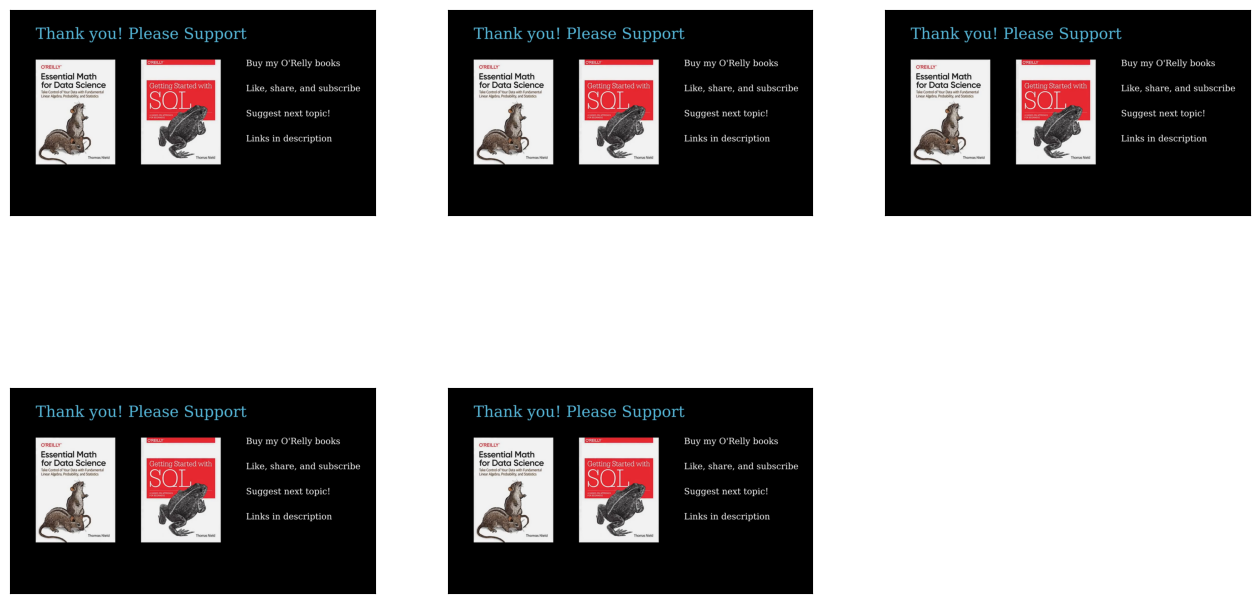

In [ ]:
plot_images(img)

## **User Q-2**

In [ ]:
query_str="what is LLiner Regression formula?"

In [ ]:
# Retrive from Lancedb based on user Q
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

#Read retrived images from o/p corpus folder
image_documents = SimpleDirectoryReader(input_dir=output_folder,  input_files=img).load_data()

#Put retrived text to context_str
context_str = "".join(txt)

**Node ID:** 99e5983f-8470-4170-9d06-781ee829a902<br>**Similarity:** 0.3910340964794159<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [ ]:
#Complete a prompt with a bunch of images
complete_response = gemini_pro.complete(
    #Pass the retrived text here in prompt template
    prompt=qa_tmpl_str.format(context_str=context_str,query_str=query_str, metadata_str=metadata_str),
    image_documents=image_documents,  #Pass the retrived images here
)

print(complete_response)

 The formula for linear regression is:

y = mx + b

where:

y is the dependent variable
x is the independent variable
m is the slope of the line
b is the y-intercept


In [ ]:
#Steam Complete a prompt with a bunch of images
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me more context for this image", #Here retrived context not passed only retrived image passed
    image_documents=image_documents,
)

for r in stream_complete_response:
    print(r.text, end="")


 Linear regression is a statistical method that uses a linear model to predict the relationship between a dependent variable and one or more independent variables. The model is represented by the equation y = mx + b, where y is the dependent variable, x is the independent variable, m is the slope of the line, and b is the y-intercept.

Linear regression is used to predict the value of a dependent variable based on the values of one or more independent variables. For example, it can be used to predict the price of a house based on its square footage and number of bedrooms.

Linear regression is a simple and easy-to-use method that can be used to make predictions about a wide variety of phenomena. However, it is important to note that linear regression is only a model, and it is not always accurate. The accuracy of a linear regression model depends on the quality of the data used to train the model and the complexity of the relationship between the dependent and independent variables.

H

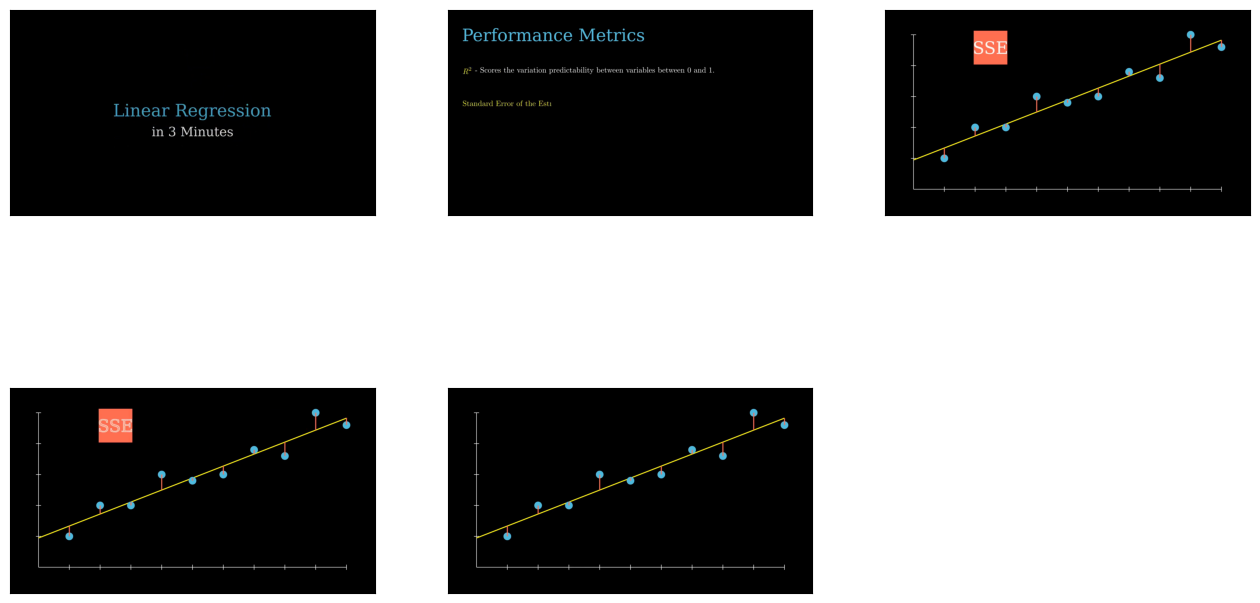

In [ ]:
plot_images(img)

> Now just passing above images also, Gemini pro model could able to provide insight

# **END**